# CODE TO IMPLEMENT A MOVIE RECOMMENDER SYSTEM

1. This notebook implements a movie recommender system.
2. Recommender system are used to suggest movies or songs to users based on their intrest or usage history.
3. For example, NETFLIX  recommends movies to watch based on the previous movies you have watched.
4. IN this example we have used item based collaberative filter.

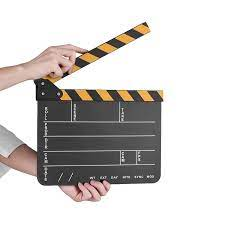


In [20]:
#LIBRAIES IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [21]:
#IMPORT DATASET
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df.head(10)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,7,Twelve Monkeys (1995)
7,8,Babe (1995)
8,9,Dead Man Walking (1995)
9,10,Richard III (1995)


In [22]:
movies_rating_df = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies_rating_df.head(10)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [13]:
movies_rating_df.drop(['timestamp'], axis = 1, inplace = True)
movies_rating_df.head(10)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
5,22,377,1
6,244,51,2
7,166,346,1
8,298,474,4
9,115,265,2


In [15]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [25]:
# Let's merge both dataframes together so we can have ID with the movie name
movies_rating_df = pd.merge(movies_rating_df, movie_titles_df, on = 'item_id') 
movies_rating_df.head(5)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [23]:
movies_rating_df.shape


(100003, 4)

In [26]:
#VISUALIZE DATASET
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [27]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']
ratings_df_count.head(10)


title
'Til There Was You (1997)                        9.0
1-900 (1994)                                     5.0
101 Dalmatians (1996)                          109.0
12 Angry Men (1957)                            125.0
187 (1997)                                      41.0
2 Days in the Valley (1996)                     93.0
20,000 Leagues Under the Sea (1954)             72.0
2001: A Space Odyssey (1968)                   259.0
3 Ninjas: High Noon At Mega Mountain (1998)      5.0
39 Steps, The (1935)                            59.0
Name: count, dtype: float64

In [29]:
ratings_mean_count_df = pd.concat([ratings_df_count, ratings_df_mean], axis = 1)
ratings_mean_count_df.reset_index()

,title,count,mean
0,'Til There Was You (1997),9.0,2.333333
1,1-900 (1994),5.0,2.600000
2,101 Dalmatians (1996),109.0,2.908257
3,12 Angry Men (1957),125.0,4.344000
4,187 (1997),41.0,3.024390
...,...,...,...
1659,Young Guns II (1990),44.0,2.772727
1660,"Young Poisoner's Handbook, The (1995)",41.0,3.341463
1661,Zeus and Roxanne (1997),6.0,2.166667
1662,unknown,9.0,3.444444


<AxesSubplot:ylabel='Frequency'>

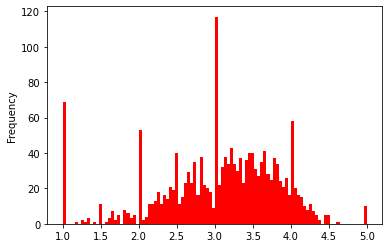

In [30]:
ratings_mean_count_df['mean'].plot(bins=100, kind='hist', color = 'r') 



<AxesSubplot:ylabel='Frequency'>

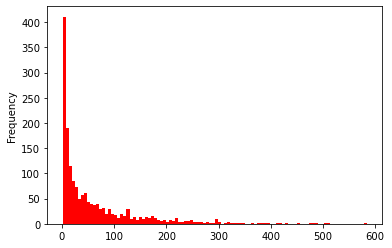

In [31]:
ratings_mean_count_df['count'].plot(bins=100, kind='hist', color = 'r') 


In [32]:
# Let's see the highest rated movies!
# Apparently these movies does not have many reviews (i.e.: small number of ratings)
ratings_mean_count_df[ratings_mean_count_df['mean'] == 5]

,count,mean
title,,
Aiqing wansui (1994),1.0,5.0
Entertaining Angels: The Dorothy Day Story (1996),1.0,5.0
"Great Day in Harlem, A (1994)",1.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0
Prefontaine (1997),3.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0
Santa with Muscles (1996),2.0,5.0
Someone Else's America (1995),1.0,5.0
Star Kid (1997),3.0,5.0


In [33]:
# List all the movies that are most rated
# Please note that they are not necessarily have the highest rating (mean)
ratings_mean_count_df.sort_values('count', ascending = False).head(100)

,count,mean
title,,
Star Wars (1977),584.0,4.359589
Contact (1997),509.0,3.803536
Fargo (1996),508.0,4.155512
Return of the Jedi (1983),507.0,4.007890
Liar Liar (1997),485.0,3.156701
...,...,...
Aladdin (1992),219.0,3.812785
Babe (1995),219.0,3.995434
Volcano (1997),219.0,2.808219


In [34]:
# Lets perform item based collaberative filtering on a single movie
userid_movietitle_matrix = movies_rating_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
Titanic = userid_movietitle_matrix['Titanic (1997)']
Titanic


user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [38]:
# Let's calculate the correlations
titanic_correlations = pd.DataFrame(userid_movietitle_matrix.corrwith(Titanic), columns=['Correlation'])
titanic_correlations = titanic_correlations.join(ratings_mean_count_df['count'])
titanic_correlations
titanic_correlations.dropna(inplace=True)
titanic_correlations

C:\Users\mrrak\anaconda3\anacondafolder\envs\pandas_rakesh\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mrrak\anaconda3\anacondafolder\envs\pandas_rakesh\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0
...,...,...
Year of the Horse (1997),1.000000,7.0
Young Frankenstein (1974),0.107666,200.0
Young Guns (1988),0.199931,101.0


In [40]:
titanic_correlations.sort_values('Correlation', ascending=False)


,Correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0
...,...,...
Lamerica (1994),-1.0,4.0
Angel Baby (1995),-1.0,4.0
Blood Beach (1981),-1.0,6.0


In [42]:
titanic_correlations[titanic_correlations['count']>80].sort_values('Correlation',ascending=False).head()


,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0


In [44]:
#Let's create a item based collaberative filter on the entire dataset
movie_correlations = userid_movietitle_matrix.corr(method = 'pearson', min_periods = 80)
# pearson : standard correlation coefficient
# Obtain the correlations between all movies in the dataframe

In [45]:
# Let's create our own dataframe with our own ratings!
myRatings = pd.read_csv("My_Ratings.csv")
#myRatings.reset_index
myRatings


,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [46]:
similar_movies_list = pd.Series()
for i in range(0, 2):
    similar_movie = movie_correlations[myRatings['Movie Name'][i]].dropna() # Get same movies with same ratings
    similar_movie = similar_movie.map(lambda x: x * myRatings['Ratings'][i]) # Scale the similarity by your given ratings
    similar_movies_list = similar_movies_list.append(similar_movie)

C:\Users\mrrak\AppData\Local\Temp\ipykernel_6536\144304751.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  similar_movies_list = pd.Series()
C:\Users\mrrak\AppData\Local\Temp\ipykernel_6536\144304751.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies_list = similar_movies_list.append(similar_movie)
C:\Users\mrrak\AppData\Local\Temp\ipykernel_6536\144304751.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies_list = similar_movies_list.append(similar_movie)


In [47]:
similar_movies_list.sort_values(inplace = True, ascending = False)
print (similar_movies_list.head(10))

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64
